In [39]:
#import dependencies
import pandas as pd
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
# read in the data
df = pd.read_csv('../Bryan/trimmed_merged.csv')
df.head()


,school_name,city,state,zip,price,bed,bath,acres,sqft,sold_year
0,PS 48 PO MICHAEL J BUCZEK,New York City,NY,10033,669000.0,2.0,1.0,0.27,870.0,2015.0
1,PS 30 WILTON,Bronx,NY,10454,799000.0,6.0,3.0,0.05,2280.0,2015.0
2,Hackettstown High School,Allamuchy Township,NJ,7840,599900.0,4.0,4.0,0.18,2450.0,2015.0
3,EDWARD A REYNOLDS WEST SIDE HIGH SCHOOL,New York City,NY,10025,5995000.0,5.0,3.0,0.03,3264.0,2015.0
4,Marlboro High School,Marlboro,NJ,7746,725000.0,4.0,4.0,0.34,2404.0,2015.0


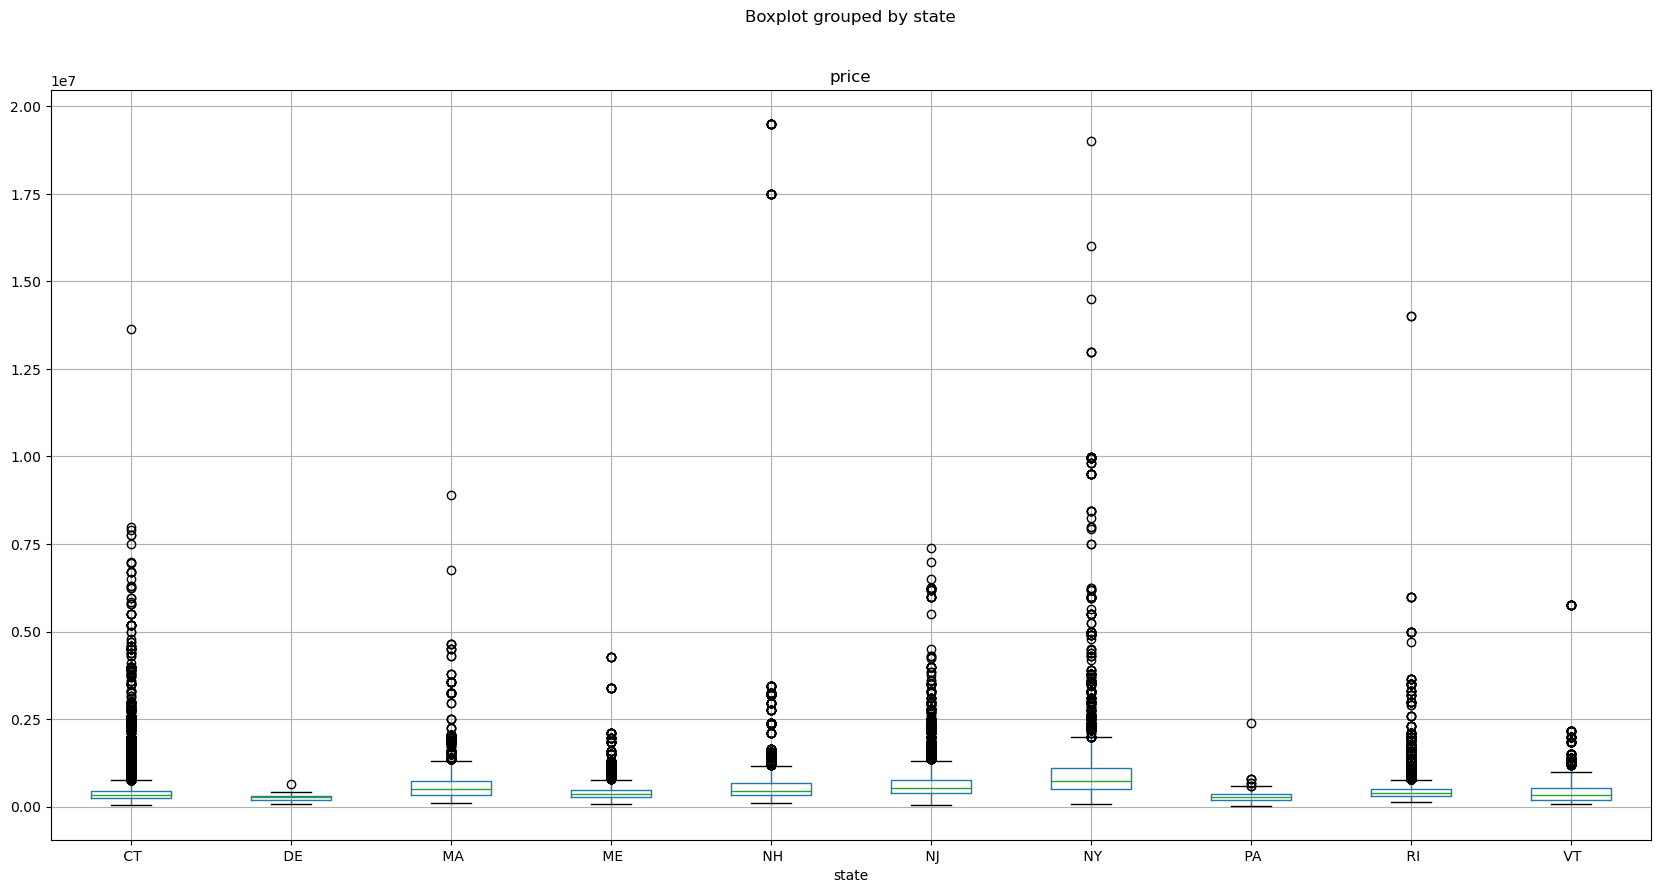

In [40]:
#Create a Boxplot for Price Column in Dataset
df.boxplot("price", by="state", figsize=(20, 10))
plt.show()

In [41]:
#Calculate upper and lower bounds for Price Column in Dataframe
quartiles = df['price'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
outlier_price_df = df.loc[(df['price'] < lower_bound) | (df['price'] > upper_bound)]




In [60]:
#New Dataframe with outliers removed
new_df = df.loc[(df['price'] > lower_bound) & (df['price'] < upper_bound)]
new_df.dtypes

school_name     object
city            object
state           object
zip              int64
price          float64
bed            float64
bath           float64
acres          float64
sqft           float64
sold_year      float64
dtype: object

In [87]:
# convert ZIP column to string
new_df['zip'] = new_df['zip'].astype(str)

# add a 0 to the front of the number in the ZIP column if the number is 4 digits long
new_df['zip'] = new_df['zip'].apply(lambda x: '0' + x if len(x) == 4 else x)



In [64]:
from sklearn.preprocessing import LabelEncoder

# Initialize a LabelEncoder
le = LabelEncoder()

# Specify the categorical columns to be encoded
cat_cols = ['school_name', 'city', 'state', 'zip']

# Apply LabelEncoder to categorical columns
for col in cat_cols:
    new_df[col] = le.fit_transform(new_df[col])

In [65]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Define features X and target y
X =new_df.drop('price', axis=1)
y = new_df['price']

# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the standard scaler
scaler = StandardScaler()

# Scale the features
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize the linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 27540122599.93377
R-squared: 0.3457350471659911


In [88]:
# Import Modules
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
from pathlib import Path
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.preprocessing import StandardScaler

# Display all of the columns
pd.set_option('display.max_columns', None)

In [89]:
# Define features X and target y
X =new_df.drop('zip', axis=1)
y = new_df['zip']

In [90]:
# Encode the categorical variables using get_dummies
X = pd.get_dummies(X)

In [91]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [92]:
X_train.shape

(32875, 9)

In [93]:
X_test.shape

(10959, 9)

In [94]:
# Create the StandardScaler instance
scaler = StandardScaler()
# Fit the Standard Scaler with the training data
X_scaler = scaler.fit(X_train)
# Scale the training data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [95]:
# Instantiate the model with k = 3 neighbors
model = KNeighborsClassifier(n_neighbors=3)

In [96]:
# Train the model
model.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=3)

In [97]:
# Create predictions
y_pred = model.predict(X_test_scaled)

# Review the predictions
y_pred

array(['481', '479', '580', ..., '520', '202', '678'], dtype=object)

In [98]:
# Print confusion matrix
confusion_matrix(y_pred,y_test)

array([[11,  0,  0, ...,  0,  0,  0],
       [ 0,  1,  0, ...,  0,  0,  0],
       [ 0,  0,  3, ...,  0,  1,  0],
       ...,
       [ 0,  0,  0, ...,  3,  0,  0],
       [ 0,  0,  0, ...,  0,  1,  0],
       [ 0,  0,  0, ...,  0,  0,  3]], dtype=int64)

In [99]:
# Print classification report
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
       01000       1.00      1.00      1.00         1
       01001       1.00      0.75      0.86         4
       01002       0.67      0.33      0.44         6
       01004       0.00      0.00      0.00         0
       01005       0.00      0.00      0.00         1
       01006       0.81      0.76      0.79        17
       01007       0.00      0.00      0.00         0
       01008       0.00      0.00      0.00         2
       01009       1.00      1.00      1.00         1
       01010       1.00      1.00      1.00         1
       01012       0.25      1.00      0.40         1
       01013       0.50      0.71      0.59         7
       01014       1.00      1.00      1.00         5
       01015       1.00      0.67      0.80         6
       01016       1.00      0.50      0.67         2
       01017       1.00      1.00      1.00         7
       01018       1.00    